In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math
import bezier

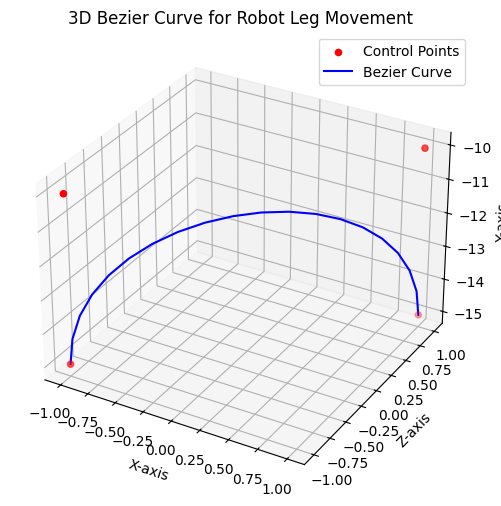

In [ ]:
# 定義控制點矩陣
step_nodes = np.asfortranarray([
    [-1.0, -1.0, 1.0, 1.0],  # x 軸
    [-1.0, -1.0, 1.0, 1.0],  # z 軸
    [-15.0, -10.0, -10.0, -15.0]  # y 軸
])

# 創建一條三階貝茲曲線
curve = bezier.Curve(step_nodes, degree=3)

# 計算貝茲曲線上的點（公式定義範圍必須為 0 到 1，細分成 20 個點來繪製平滑曲線）
s_vals = np.linspace(0.0, 1.0, 20)
curve_points = curve.evaluate_multi(s_vals)

# 可視化
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# 繪製控制點
ax.scatter(step_nodes[0], step_nodes[1], step_nodes[2], color='red', label='Control Points')
# 繪製貝茲曲線
ax.plot(curve_points[0], curve_points[1], curve_points[2], color='blue', label='Bezier Curve')

# 設置標籤和圖例
ax.set_xlabel("X-axis")
ax.set_ylabel("Z-axis")
ax.set_zlabel("Y-axis")
ax.legend()
ax.set_title("3D Bezier Curve for Robot Leg Movement")

plt.show()

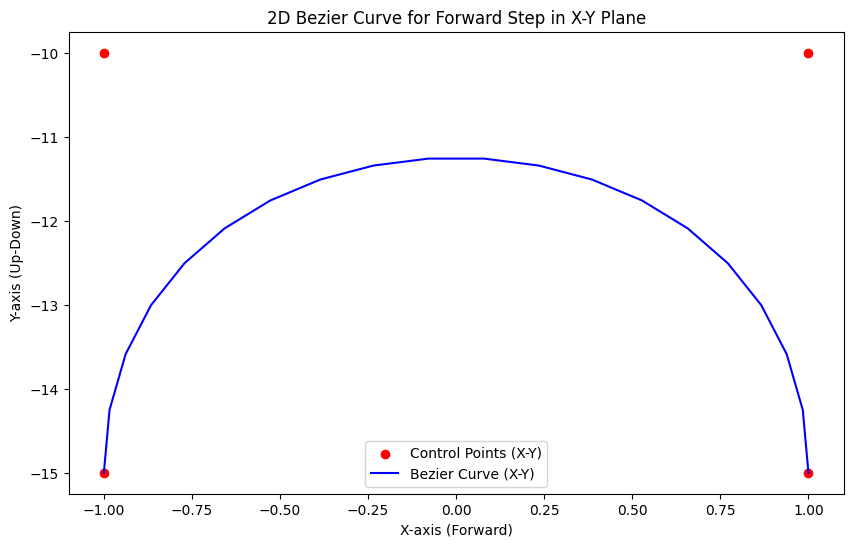

In [ ]:
step_nodes = np.asfortranarray([
    [-1.0, -1.0, 1.0, 1.0],
    [0.0, 0.0, 0.0, 0.0],
    [-15.0, -10.0, -10.0, -15.0]
])

# 創建一條三階貝茲曲線
curve = bezier.Curve(step_nodes, degree=3)

# 計算貝茲曲線上的點（公式定義範圍必須為 0 到 1，細分成 20 個點來繪製平滑曲線）
s_vals = np.linspace(0.0, 1.0, 20)
curve_points = curve.evaluate_multi(s_vals)

# 創建 Matplotlib 圖像
fig = plt.figure(figsize=(10, 6))

# 繪製 2D 圖像，僅在 X-Y 平面上
ax2d = fig.add_subplot(111)
# 繪製控制點
ax2d.scatter(step_nodes[0], step_nodes[2], color='red', label='Control Points (X-Y)')
# 繪製貝茲曲線
ax2d.plot(curve_points[0], curve_points[2], color='blue', label='Bezier Curve (X-Y)')

# 設置標籤和圖例
ax2d.set_xlabel("X-axis (Forward)")
ax2d.set_ylabel("Y-axis (Up-Down)")
ax2d.legend()
ax2d.set_title("2D Bezier Curve for Forward Step in X-Y Plane")

# 顯示圖像
plt.show()

c:\Users\bi117\Desktop\test_code\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36600 (\N{CJK UNIFIED IDEOGRAPH-8EF8}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bi117\Desktop\test_code\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bi117\Desktop\test_code\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22120 (\N{CJK UNIFIED IDEOGRAPH-5668}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bi117\Desktop\test_code\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bi117\Desktop\test_code\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33151

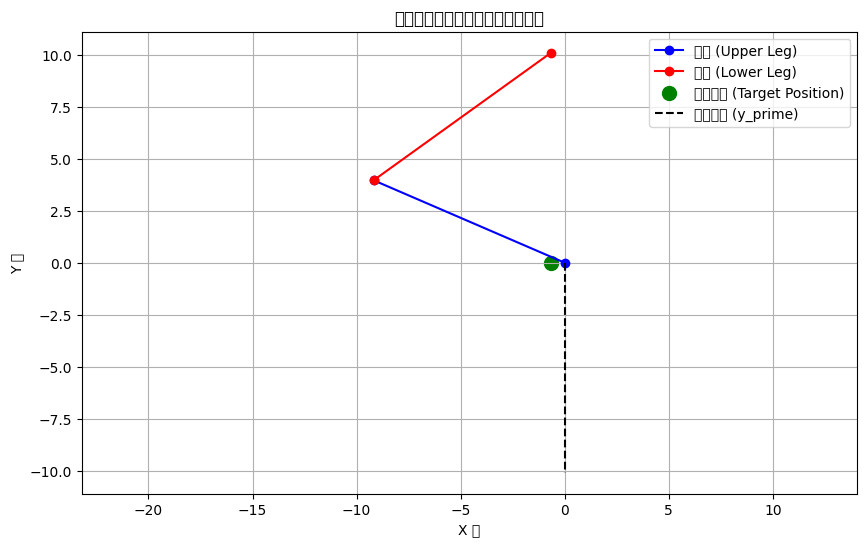

In [21]:
# 定義輸入變數
index = 5
x_all, y_all, z_all = curve_points
i1 = index%40
i2 = (index+20)%40
x = x_all[i1]
y = y_all[i1]
z = z_all[i1]
L = 2.0   # 腿部的偏移量

# 計算合成距離 y_prime
y_prime = -math.sqrt((z + L)**2 + y**2)

# 計算角度 thetaz
thetaz = math.atan2(z + L, abs(y)) - math.atan2(L, abs(y_prime))

# 設置機器人大腿和小腿的長度
a1 = 10.0  # 大腿長度
a2 = 10.5  # 小腿長度

# 計算肘部角度 theta2
c2 = (x**2 + y_prime**2 - a1**2 - a2**2) / (2 * a1 * a2)
s2 = math.sqrt(1 - c2**2)
theta2 = math.atan2(s2, c2)

# 重新計算 c2 和 s2
c2 = math.cos(theta2)
s2 = math.sin(theta2)

# 計算肩部角度 theta1
c1 = (x * (a1 + (a2 * c2)) + y_prime * (a2 * s2)) / (x**2 + y_prime**2)
s1 = (y_prime * (a1 + (a2 * c2)) - x * (a2 * s2)) / (x**2 + y_prime**2)
theta1 = math.atan2(s1, c1)

# 計算肩部和肘部的最終角度
theta_shoulder = -theta1
theta_elbow = theta_shoulder - theta2

# 可視化原理
fig, ax = plt.subplots(figsize=(10, 6))

# 繪製機器人大腿和小腿的初始位置
x_shoulder = 0
y_shoulder = 0
x_knee = x_shoulder + a1 * math.cos(theta_shoulder)
y_knee = y_shoulder + a1 * math.sin(theta_shoulder)
x_foot = x_knee + a2 * math.cos(theta_elbow)
y_foot = y_knee + a2 * math.sin(theta_elbow)

# 繪製大腿和小腿
ax.plot([x_shoulder, x_knee], [y_shoulder, y_knee], 'bo-', label='大腿 (Upper Leg)')
ax.plot([x_knee, x_foot], [y_knee, y_foot], 'ro-', label='小腿 (Lower Leg)')

# 繪製目標位置
ax.scatter(x, y, color='green', s=100, label='目標位置 (Target Position)')

# 繪製合成距離 y_prime
ax.plot([0, 0], [0, y_prime], 'k--', label='合成距離 (y_prime)')

# 設置圖例和標籤
ax.set_xlabel("X 軸")
ax.set_ylabel("Y 軸")
ax.set_title("機器人腿部反向運動學計算示意圖")
ax.legend()
ax.axis('equal')

plt.grid()
plt.show()

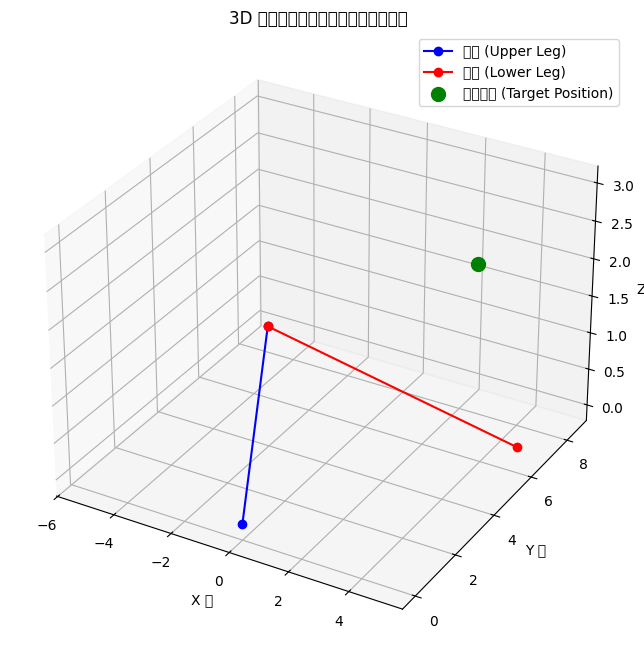

In [20]:
x = 5.0   # 腳部在 x 軸上的位置
y = 4.0   # 腳部在 y 軸上的位置
z = 3.0   # 腳部在 z 軸上的位置
L = 2.0   # 腿部的偏移量

# 計算合成距離 y_prime
y_prime = -math.sqrt((z + L)**2 + y**2)

# 設置機器人大腿和小腿的長度
a1 = 10.0  # 大腿長度
a2 = 10.5  # 小腿長度

# 計算肘部角度 theta2
c2 = (x**2 + y_prime**2 - a1**2 - a2**2) / (2 * a1 * a2)
s2 = math.sqrt(1 - c2**2)
theta2 = math.atan2(s2, c2)

# 重新計算 c2 和 s2
c2 = math.cos(theta2)
s2 = math.sin(theta2)

# 計算肩部角度 theta1
c1 = (x * (a1 + (a2 * c2)) + y_prime * (a2 * s2)) / (x**2 + y_prime**2)
s1 = (y_prime * (a1 + (a2 * c2)) - x * (a2 * s2)) / (x**2 + y_prime**2)
theta1 = math.atan2(s1, c1)

# 計算肩部和肘部的最終角度
theta_shoulder = -theta1
theta_elbow = theta_shoulder - theta2

# 3D 可視化
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 計算關節的位置
x_shoulder, y_shoulder, z_shoulder = 0, 0, 0  # 肩部關節的位置
x_knee = x_shoulder + a1 * math.cos(theta_shoulder)
y_knee = y_shoulder + a1 * math.sin(theta_shoulder)
z_knee = z_shoulder  # 在這個模型中，膝蓋在 z 軸上不移動

x_foot = x_knee + a2 * math.cos(theta_elbow)
y_foot = y_knee + a2 * math.sin(theta_elbow)
z_foot = z_knee  # 在這個模型中，腳部在 z 軸上不移動

# 繪製大腿和小腿
ax.plot([x_shoulder, x_knee], [y_shoulder, y_knee], [z_shoulder, z_knee], 'bo-', label='大腿 (Upper Leg)')
ax.plot([x_knee, x_foot], [y_knee, y_foot], [z_knee, z_foot], 'ro-', label='小腿 (Lower Leg)')

# 繪製目標位置
ax.scatter(x, y, z, color='green', s=100, label='目標位置 (Target Position)')

# 設置圖例和標籤
ax.set_xlabel("X 軸")
ax.set_ylabel("Y 軸")
ax.set_zlabel("Z 軸")
ax.set_title("3D 機器人腿部反向運動學計算示意圖")
ax.legend()
ax.grid(True)

plt.show()